**Afshar - Q1**

سوال اول در مورد استفاده از سری فوریه است.
ابتدا یک سیگنال دلخواه تولید شده و سری فوریه و عکس سری فوریه برای سیگنال بدست آورده شده.
سپس سیگنال صوتی فایل صوتی گفته شده خوانده شده است و سری فوریه آن بدست آورده شده
و عکس سری
فوریه و مقدار خطای بین آنها بدست آورده و نمایش داده شده است.
در بخش آخر سوال، دو سیگنالی که یکی آورده شده در
صورت سوال هست و دیگری فایل صوتی معرفی شده در صورت سوال، خوانده شده است و هر دو سیگنال فریم بندی
شده اند و ضرایب سری فوریه برای هر کدام بدست آورده شده است و در نهایت نمودار واترفال سه بعدی برای
هر کدام رسم شده است


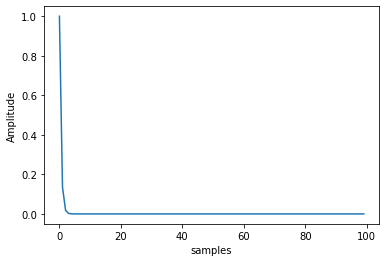

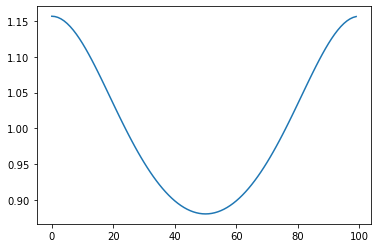

In [ ]:
#Part 1
import numpy as np
import matplotlib.pyplot as plt

N = 100
n = np.arange(N)
x = np.exp(-2*n)

plt.figure()
plt.plot(n, x)
plt.xlabel('samples')
plt.ylabel('Amplitude')

Xk = np.fft.fft(x)

plt.figure()
plt.plot(n, np.abs(Xk))


Text(0, 0.5, 'Amplitude')

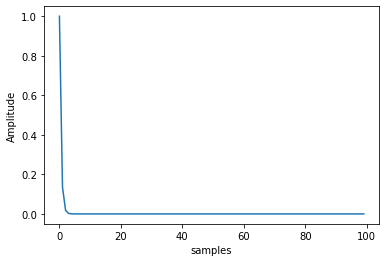

In [ ]:
#part2

x_hat = np.fft.ifft(Xk)

plt.figure()
plt.plot(n, x_hat.real)
plt.xlabel('samples')
plt.ylabel('Amplitude')


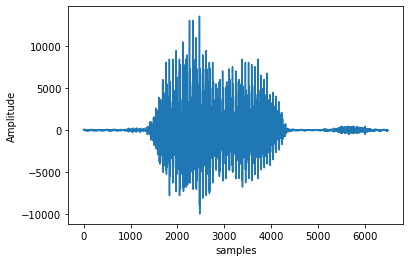

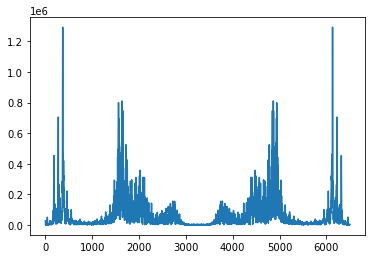

In [ ]:
from scipy.io.wavfile import read
import matplotlib.pyplot as plt

(rate, x1) = read("1.wav")

plt.figure()
plt.plot(x1)
plt.xlabel('samples')
plt.ylabel('Amplitude')

N1 = len(x1)
Xk1 = np.fft.fft(x1)

plt.figure()
plt.plot(np.abs(Xk1))


Error of reconstruction is :
2.1240496449281226e-25


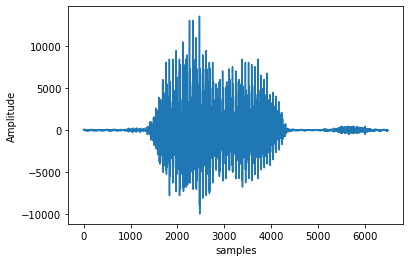

In [ ]:
#part4
x1_hat = np.fft.ifft(Xk1)

plt.figure()
plt.plot(x1_hat.real)
plt.xlabel('samples')
plt.ylabel('Amplitude')

MSE = np.mean((x1 - x1_hat.real) ** 2)

print('Error of reconstruction is :')
print(MSE)


In [ ]:
#a functions that we need in part5
def enframe(x, win):
    nx = len(x)
    if isinstance(win,int):
        len_ = win
    else:
        len_ = len(win)
    nf = nx // len_
    f = np.zeros((nf, len_))
    inds = np.arange(len_)
    for i in range(nf):
        f[i,:] = x[inds]
    return f

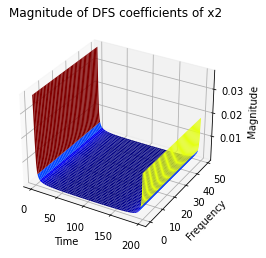

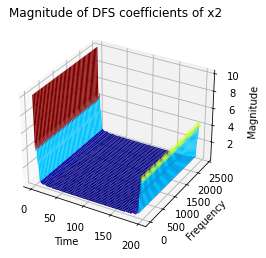

In [ ]:
#part5
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fs = 10000
t = np.linspace(0, 1, int(fs))
alpha = 2
beta = 0.7

x2 = alpha * np.sin(beta * t ** 2)
fs, x3 = wavfile.read('variable_pitch.wav')

enfx2 = enframe(x2, 200)
enfx3 = enframe(x3, 200)

nf2 = enfx2.shape[0]
nf3 = enfx3.shape[0]

X2 = np.zeros((nf2, 200), dtype=complex)
for i in range(nf2):
    X2[i, :] = np.fft.fft(enfx2[i, :], 200)

X3 = np.zeros((nf3, 200), dtype=complex)
for i in range(nf3):
    X3[i, :] = np.fft.fft(enfx3[i, :], 200)

T3 = np.arange(200)
F3 = np.arange(nf3)

T2 = np.arange(200)
F2 = np.arange(nf2)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(T2, F2)
ax.plot_surface(X, Y, np.abs(X2), cmap='jet')
ax.set_xlabel('Time')
ax.set_ylabel('Frequency')
ax.set_zlabel('Magnitude')
ax.set_title('Magnitude of DFS coefficients of x2')
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(T3, F3)
ax.plot_surface(X, Y, np.abs(X3), cmap='jet')
ax.set_xlabel('Time')
ax.set_ylabel('Frequency')
ax.set_zlabel('Magnitude')
ax.set_title('Magnitude of DFS coefficients of x2')
plt.show()

plt.show()


*part6

شکل های بالا به ترتیب برای سیگنال صورت پروژه و سیگنال صوتی ذکر شده است.
همان طور که دیده می شود در حالت استفاده از فریم بندی و زمان کوتاه، سیگنال زمانی به درستی قابل تشخیص
است و همچنین دقت فرکانسی در ضرایب سری فوریه نیز بیشتر خواهد بود.